In [1]:
#Importing the packages
import numpy as np
import netCDF4 as nc
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
list_files = ["AERDB_D3_VIIRS_SNPP.A2021091.001.2021095001302.nc",
              "AERDB_D3_VIIRS_SNPP.A2021092.001.2021096001207.nc",
              "AERDB_D3_VIIRS_SNPP.A2021093.001.2021097000104.nc",
              "AERDB_D3_VIIRS_SNPP.A2021094.001.2021098001051.nc",
              "AERDB_D3_VIIRS_SNPP.A2021095.001.2021099000754.nc",
              "AERDB_D3_VIIRS_SNPP.A2021096.001.2021100000548.nc",
              "AERDB_D3_VIIRS_SNPP.A2021097.001.2021101000703.nc",
              "AERDB_D3_VIIRS_SNPP.A2021098.001.2021102001537.nc",
              "AERDB_D3_VIIRS_SNPP.A2021099.001.2021103000048.nc",
              "AERDB_D3_VIIRS_SNPP.A2021100.001.2021104001029.nc"]

record_datetime = []
record_aerosol_SF = []

for filename in list_files:
    ds = nc.Dataset(filename)
    aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
    # Excludes invalid values
    aerosol[aerosol<0] = np.nan

    SF_latitude = 37.5
    SF_longitude = -122.5
    latitude_filter = np.array(ds.variables['Latitude']) == SF_latitude
    longitude_filter = np.array(ds.variables['Longitude']) == SF_longitude
    latitude_and_longitude_filter = latitude_filter & longitude_filter
    SF_aerosol = aerosol[latitude_and_longitude_filter][0]

    # Access the datetime record (in DAAS format, or text format): 
    raw_datetime = ds.time_coverage_start

    # Process the datetime record to a form that can be plotted:
    processed_datetime = datetime.strptime(raw_datetime[:10], "%Y-%m-%d")
    
    record_aerosol_SF.append(SF_aerosol)
    record_datetime.append(processed_datetime)

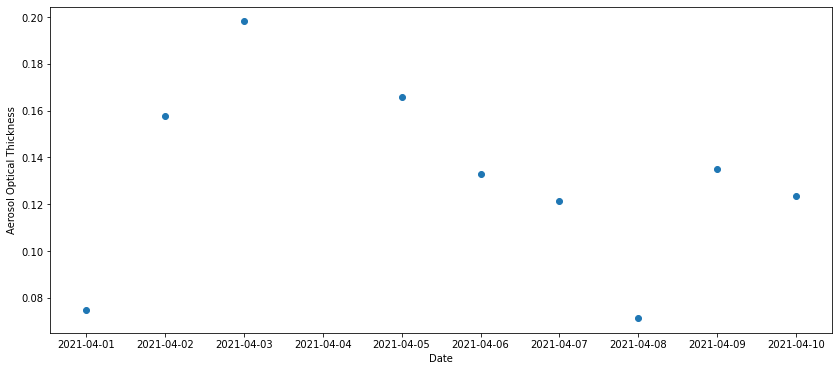

In [3]:
plt.figure(figsize=(14,6))
plt.scatter(record_datetime, record_aerosol_SF)
plt.xlabel("Date")
plt.ylabel("Aerosol Optical Thickness")
plt.show()

In [4]:
print(record_aerosol_SF)

[0.07485436, 0.15773441, 0.19810559, nan, 0.16591643, 0.13282655, 0.12146429, 0.07139904, 0.13508497, 0.12333769]
